In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
traning_set=tf.keras.utils.image_dataset_from_directory(
    '../Food_classification/fruits and vegetables/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
#     data_format=None,
 )

Found 3115 files belonging to 36 classes.


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '../Food_classification/fruits and vegetables/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
#     data_format=None,
 )

Found 351 files belonging to 36 classes.


In [5]:
cnn=tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [12]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [13]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
traning_histroy=cnn.fit(x=traning_set,validation_data=validation_set,epochs=32)

Epoch 1/32


98/98 [==============================] - 73s 700ms/step - loss: 6.0823 - accuracy: 0.0340 - val_loss: 3.3982 - val_accuracy: 0.0655
Epoch 2/32
98/98 [==============================] - 64s 600ms/step - loss: 3.4740 - accuracy: 0.0546 - val_loss: 3.2502 - val_accuracy: 0.1054
Epoch 3/32
98/98 [==============================] - 70s 692ms/step - loss: 3.3103 - accuracy: 0.0783 - val_loss: 2.9368 - val_accuracy: 0.1909
Epoch 4/32
98/98 [==============================] - 81s 779ms/step - loss: 3.0733 - accuracy: 0.1300 - val_loss: 2.6556 - val_accuracy: 0.2906
Epoch 5/32
98/98 [==============================] - 80s 775ms/step - loss: 2.8902 - accuracy: 0.1827 - val_loss: 2.3937 - val_accuracy: 0.3419
Epoch 6/32
98/98 [==============================] - 80s 770ms/step - loss: 2.6048 - accuracy: 0.2578 - val_loss: 1.8475 - val_accuracy: 0.5214
Epoch 7/32
98/98 [==============================] - 80s 771ms/step - loss: 2.2015 - accuracy: 0.3785 - val_loss: 1.5751 - val_accuracy: 0.58

In [15]:
cnn.save('trained_model.h5')

c:\Users\Sidha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import json
with open('training_hist.json','w') as f:
  json.dump(traning_histroy.history,f)

In [17]:
print('validation set accuracy: {} %'.format(traning_histroy.history['val_accuracy'][-1]))

validation set accuracy: 0.9601139426231384 %


In [32]:

import cv2
image_path='../Food_classification/fruits and vegetables/test/carrot/Image_1.jpg'
img=cv2.imread(image_path)

In [33]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
predictions=cnn.predict(input_arr)

1/1 [==============================] - 1s 1s/step


In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '../Food_classification/fruits and vegetables/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
#     data_format=None,
 )

Found 359 files belonging to 36 classes.


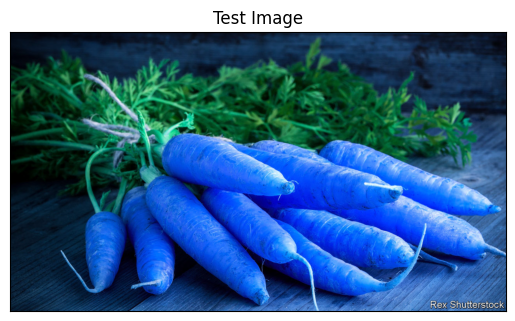

In [35]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
result_index=np.where(predictions[0]==max(predictions[0]))
print('The item is {}'.format(test_set.class_names[result_index[0][0]]))

The item is carrot
